# Network Security Assignment-2


## Name- Sudhanva Rao Santhur
## Roll no- 19095096
## Department- ECE


In [155]:
import matplotlib.pyplot as plt
import numpy as np

### Hammering Distance Calculation

In [156]:
def hammingDist(s1, s2):
    i = 0
    count = 0
 
    while(i < len(s1)):
        if(s1[i] != s2[i]):
            count += 1
        i += 1
    return count

### Data Encryption standard Program is used from GFG

In [157]:
# Hexadecimal to binary conversion
def hex2bin(s):
	mp = {'0' : "0000",
		'1' : "0001",
		'2' : "0010",
		'3' : "0011",
		'4' : "0100",
		'5' : "0101",
		'6' : "0110",
		'7' : "0111",
		'8' : "1000",
		'9' : "1001",
		'A' : "1010",
		'B' : "1011",
		'C' : "1100",
		'D' : "1101",
		'E' : "1110",
		'F' : "1111" }
	bin = ""
	for i in range(len(s)):
		bin = bin + mp[s[i]]
	return bin
	
# Binary to hexadecimal conversion
def bin2hex(s):
	mp = {"0000" : '0',
		"0001" : '1',
		"0010" : '2',
		"0011" : '3',
		"0100" : '4',
		"0101" : '5',
		"0110" : '6',
		"0111" : '7',
		"1000" : '8',
		"1001" : '9',
		"1010" : 'A',
		"1011" : 'B',
		"1100" : 'C',
		"1101" : 'D',
		"1110" : 'E',
		"1111" : 'F' }
	hex = ""
	for i in range(0,len(s),4):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		hex = hex + mp[ch]
		
	return hex

# Binary to decimal conversion
def bin2dec(bin):
	dec = 0
	i = 0
	n = 0
	
	while(bin != 0):
		dec = dec + (bin % 10) * pow(2, i)
		bin = bin//10
		i += 1
	return dec

# Decimal to binary conversion
def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res)%4 != 0):
		div = len(res) / 4
		div = int(div)
		counter =(4 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res

# Permute function to rearrange the bits
def permute(k, arr, n):
	permutation = ""
	for i in range(0, n):
		permutation = permutation + k[arr[i] - 1]
	return permutation

# shifting the bits towards left by nth shifts
def shift_left(k, nth_shifts):
	s = ""
	for i in range(nth_shifts):
		for j in range(1,len(k)):
			s = s + k[j]
		s = s + k[0]
		k = s
		s = ""
	return k

# calculating xow of two strings of binary number a and b
def xor(a, b):
	ans = ""
	for i in range(len(a)):
		if a[i] == b[i]:
			ans = ans + "0"
		else:
			ans = ans + "1"
	return ans

# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
				60, 52, 44, 36, 28, 20, 12, 4,
				62, 54, 46, 38, 30, 22, 14, 6,
				64, 56, 48, 40, 32, 24, 16, 8,
				57, 49, 41, 33, 25, 17, 9, 1,
				59, 51, 43, 35, 27, 19, 11, 3,
				61, 53, 45, 37, 29, 21, 13, 5,
				63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1 , 2 , 3 , 4 , 5 , 4 , 5,
		6 , 7 , 8 , 9 , 8 , 9 , 10, 11,
		12, 13, 12, 13, 14, 15, 16, 17,
		16, 17, 18, 19, 20, 21, 20, 21,
		22, 23, 24, 25, 24, 25, 26, 27,
		28, 29, 28, 29, 30, 31, 32, 1 ]

# Straight Permutation Table
per = [ 16, 7, 20, 21,
		29, 12, 28, 17,
		1, 15, 23, 26,
		5, 18, 31, 10,
		2, 8, 24, 14,
		32, 27, 3, 9,
		19, 13, 30, 6,
		22, 11, 4, 25 ]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
		[ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
		[ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]],
			
		[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
			[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
			[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]],

		[ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
			[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]],
	
		[ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
			[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ],
		
		[ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
			[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]],
	
		[ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
			[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
			[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
		
		[ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
			[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
			[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ],
		
		[ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
			[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
			[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
			[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ]

# Final Permutation Table
final_perm = [ 40, 8, 48, 16, 56, 24, 64, 32,
			39, 7, 47, 15, 55, 23, 63, 31,
			38, 6, 46, 14, 54, 22, 62, 30,
			37, 5, 45, 13, 53, 21, 61, 29,
			36, 4, 44, 12, 52, 20, 60, 28,
			35, 3, 43, 11, 51, 19, 59, 27,
			34, 2, 42, 10, 50, 18, 58, 26,
			33, 1, 41, 9, 49, 17, 57, 25 ]

def encrypt(pt, rkb, rk):
	
	# Initial Permutation
	pt = permute(pt, initial_perm, 64)
# 	print("After initial permutation", bin2hex(pt))
	print("Enciphering....")
	roundCyphertexts = []
	# Splitting
	left = pt[0:32]
	right = pt[32:64]
	for i in range(0, 16):
		# Expansion D-box: Expanding the 32 bits data into 48 bits
		right_expanded = permute(right, exp_d, 48)
		
		# XOR RoundKey[i] and right_expanded
		xor_x = xor(right_expanded, rkb[i])

		# S-boxex: substituting the value from s-box table by calculating row and column
		sbox_str = ""
		for j in range(0, 8):
			row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
			col = bin2dec(int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
			val = sbox[j][row][col]
			sbox_str = sbox_str + dec2bin(val)
			
		# Straight D-box: After substituting rearranging the bits
		sbox_str = permute(sbox_str, per, 32)
		
		# XOR left and sbox_str
		result = xor(left, sbox_str)
		left = result
		
		# Swapper
		if(i != 15):
			left, right = right, left
		roundCyphertexts.append(left+right)
# 		print("Round ", i + 1, " ", bin2hex(left), " ", bin2hex(right), " ", rk[i])
	
	# Combination
	combine = left + right
	print("Your plaintext has been enciphered!")
	# Final permutation: final rearranging of bits to get cipher text
	cipher_text = permute(combine, final_perm, 64)
	return roundCyphertexts

# pt = "123456ABCD132539"
original_plain_text = "0001001000110100010101101010101111001101000100110010010100111001"
# key = "BABA10182736DCDC"
key = "1011101010111010000100000001100000100111001101101101110011011100"
original_key = key
# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
		1, 58, 50, 42, 34, 26, 18,
		10, 2, 59, 51, 43, 35, 27,
		19, 11, 3, 60, 52, 44, 36,
		63, 55, 47, 39, 31, 23, 15,
		7, 62, 54, 46, 38, 30, 22,
		14, 6, 61, 53, 45, 37, 29,
		21, 13, 5, 28, 20, 12, 4 ]

# getting 56 bit key from 64 bit using the parity bits
key = permute(key, keyp, 56)

# Number of bit shifts
shift_table = [1, 1, 2, 2,
				2, 2, 2, 2,
				1, 2, 2, 2,
				2, 2, 2, 1 ]

# Key- Compression Table : Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
			3, 28, 15, 6, 21, 10,
			23, 19, 12, 4, 26, 8,
			16, 7, 27, 20, 13, 2,
			41, 52, 31, 37, 47, 55,
			30, 40, 51, 45, 33, 48,
			44, 49, 39, 56, 34, 53,
			46, 42, 50, 36, 29, 32 ]

# Splitting
left = key[0:28] # rkb for RoundKeys in binary
right = key[28:56] # rk for RoundKeys in hexadecimal

rkb = []
rk = []
for i in range(0, 16):
	# Shifting the bits by nth shifts by checking from shift table
	left = shift_left(left, shift_table[i])
	right = shift_left(right, shift_table[i])
	
	# Combination of left and right string
	combine_str = left + right
	
	# Compression of key from 56 to 48 bits
	round_key = permute(combine_str, key_comp, 48)

	rkb.append(round_key)
	rk.append(bin2hex(round_key))

print("Initial Encryption")
initial_cipher_texts = encrypt(original_plain_text, rkb, rk)

Initial Encryption
Enciphering....
Your plaintext has been enciphered!


### 5 new Plaintext by taking hamming distance of 1-5 from original plaintext

In [158]:
# Now creating a  new plaintext with a Hamming distance of 1 from the original_plain_text
plain_text1 = "0101001000110100010101101010101111001101000100110010010100110110"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, plain_text1))

# Now creating a  new plaintext with a Hamming distance of 1 from the original_plain_text
plain_text1_cipher_texts = encrypt(plain_text1, rkb, rk)

Encryption with Plaintext of Hamming distance:  5
Enciphering....
Your plaintext has been enciphered!


In [159]:
# Now creating a  new plaintext with a Hamming distance of 2 from the original_plain_text
plain_text2 = "0001001010110100010100101010101111001101000100110010010100110110"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, plain_text2))

# Now creating a  new plaintext with a Hamming distance of 2 from the original_plain_text
plain_text2_cipher_texts = encrypt(plain_text2, rkb, rk)

Encryption with Plaintext of Hamming distance:  6
Enciphering....
Your plaintext has been enciphered!


In [160]:
# Now creating a  new plaintext with a Hamming distance of 3 from the original_plain_text
plain_text3 = "0001001000110100010111101010100111001101000000110010010100110110"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, plain_text3))

# Now creating a  new plaintext with a Hamming distance of 3 from the original_plain_text
plain_text3_cipher_texts = encrypt(plain_text3, rkb, rk)

Encryption with Plaintext of Hamming distance:  7
Enciphering....
Your plaintext has been enciphered!


In [161]:
# Now creating a  new plaintext with a Hamming distance of 4 from the original_plain_text
plain_text4 = "0001101000110101010101100010101111001101000100100010010100110110"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, plain_text4))

# Now creating a  new plaintext with a Hamming distance of 4 from the original_plain_text
plain_text4_cipher_texts = encrypt(plain_text4, rkb, rk)

Encryption with Plaintext of Hamming distance:  8
Enciphering....
Your plaintext has been enciphered!


In [162]:
# Now creating a  new plaintext with a Hamming distance of 5 from the original_plain_text
plain_text5 = "0001001000110100010101101010101011001101100100110010110100110000"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, plain_text5))

# Now creating a  new plaintext with a Hamming distance of 5 from the original_plain_text
plain_text5_cipher_texts = encrypt(plain_text5, rkb, rk)

Encryption with Plaintext of Hamming distance:  5
Enciphering....
Your plaintext has been enciphered!


### Keys with different hamming distances for the original plaintext

In [163]:
# To perform this we will be creating a utility function which will take the 64 bit key and then return list of cypher_texts

def get_cipher_texts_for_given_key(key):
    keyp = [57, 49, 41, 33, 25, 17, 9,
            1, 58, 50, 42, 34, 26, 18,
            10, 2, 59, 51, 43, 35, 27,
            19, 11, 3, 60, 52, 44, 36,
            63, 55, 47, 39, 31, 23, 15,
            7, 62, 54, 46, 38, 30, 22,
            14, 6, 61, 53, 45, 37, 29,
            21, 13, 5, 28, 20, 12, 4 ]


 # Using the parity bits we get 56 bit key from 64 bit
    key = permute(key, keyp, 56)

    # Bit shifts number
    shift_table = [1, 1, 2, 2,
                    2, 2, 2, 2,
                    1, 2, 2, 2,
                    2, 2, 2, 1 ]

    # Key- Compression Table : Now we compress the key from 56 bit to 48 bit
    key_comp = [14, 17, 11, 24, 1, 5,
                3, 28, 15, 6, 21, 10,
                23, 19, 12, 4, 26, 8,
                16, 7, 27, 20, 13, 2,
                41, 52, 31, 37, 47, 55,
                30, 40, 51, 45, 33, 48,
                44, 49, 39, 56, 34, 53,
                46, 42, 50, 36, 29, 32 ]

    # Splitting the keys
    left = key[0:28] # It is the rkb for RoundKeys in binary
    right = key[28:56] # It is the rk for RoundKeys in hexadecimal

    rkb = []
    rk = []
    for i in range(0, 16):
        # Now we perform  Shifting of the bits by nth shifts by checking from shift table
        left = shift_left(left, shift_table[i])
        right = shift_left(right, shift_table[i])

        # Combining left and right string
        combine_str = left + right

        # Finally compressing key from 56 bits to 48 bits
        round_key = permute(combine_str, key_comp, 48)

        rkb.append(round_key)
        rk.append(bin2hex(round_key))
    
    cipher_texts = encrypt(original_plain_text, rkb, rk)
    
    return cipher_texts

### Creating 5 different keys from original key by taking hamming distance 1-5

In [164]:
# Creating first key from original key by taking hamming distance of 1
Key1 = "1110101010111011000010010001100000100111001101101100110011011101"
print("Hamming distance of this key from original key: ", hammingDist(Key1, original_key))
key1_cipher_texts = get_cipher_texts_for_given_key(Key1)

Hamming distance of this key from original key:  8
Enciphering....
Your plaintext has been enciphered!


In [165]:
# Creating second key from original key by taking hamming distance of 2
Key2 = "1010101010111101000010010001100000100111001101101100110011011101"
print("Hamming distance of this key from original key: ", hammingDist(Key2, original_key))
key2_cipher_texts = get_cipher_texts_for_given_key(Key2)

Hamming distance of this key from original key:  9
Enciphering....
Your plaintext has been enciphered!


In [166]:
# Creating third key from original key by taking hamming distance of 3
Key3 = "1010101010111011000010010001100100100111001101100100110011001101"
print("Hamming distance of this key from original key: ", hammingDist(Key3, original_key))
key3_cipher_texts = get_cipher_texts_for_given_key(Key3)

Hamming distance of this key from original key:  10
Enciphering....
Your plaintext has been enciphered!


In [167]:
# Creating fourth key from original key by taking hamming distance of 4
Key4 = "1010111010111011000100010001100000100111001101101101110011011101"
print("Hamming distance of this key from original key: ", hammingDist(Key4, original_key))
key4_cipher_texts = get_cipher_texts_for_given_key(Key4)

Hamming distance of this key from original key:  5
Enciphering....
Your plaintext has been enciphered!


In [168]:
# Creating fifth key from original key by taking hamming distance of 5
Key5 = "1000101010111011001010010001000000100111101101101100010011011101"
print("Hamming distance of this key from original key: ", hammingDist(Key5, original_key))
key5_cipher_texts = get_cipher_texts_for_given_key(Key5)

Hamming distance of this key from original key:  12
Enciphering....
Your plaintext has been enciphered!


### calculating the hamming distance for ciphertexts of each round ,for a particular hamming distance

In [169]:
def getHammingDistanceArray(initial_cipher_texts, new_cipher_texts):
    hammingDistances = []
    for i in range(len(initial_cipher_texts)):
        hammingDistances.append(hammingDist(initial_cipher_texts[i], new_cipher_texts[i]))
    hammingDistances = np.array(hammingDistances)
    
    return hammingDistances

#### Calculating the hamming distances of Cipertexts for different values of deltaP, keeping the key fixed

In [170]:
Delta_C1_for_P1 = getHammingDistanceArray(initial_cipher_texts, plain_text1_cipher_texts)

Delta_C2_for_P2 = getHammingDistanceArray(initial_cipher_texts, plain_text2_cipher_texts)

Delta_C3_for_P3 = getHammingDistanceArray(initial_cipher_texts, plain_text3_cipher_texts)

Delta_C4_for_P4 = getHammingDistanceArray(initial_cipher_texts, plain_text4_cipher_texts)

Delta_C5_for_P5 = getHammingDistanceArray(initial_cipher_texts, plain_text5_cipher_texts)

####  Calculating the hamming distances of Cipertexts for different values of deltaK, keeping the plaintext fixed

In [171]:
Delta_C1_for_K1 = getHammingDistanceArray(initial_cipher_texts, key1_cipher_texts)

Delta_C2_for_K2 = getHammingDistanceArray(initial_cipher_texts, key2_cipher_texts)

Delta_C3_for_K3 = getHammingDistanceArray(initial_cipher_texts, key3_cipher_texts)

Delta_C4_for_K4 = getHammingDistanceArray(initial_cipher_texts, key4_cipher_texts)

Delta_C5_for_K5 = getHammingDistanceArray(initial_cipher_texts, key5_cipher_texts)

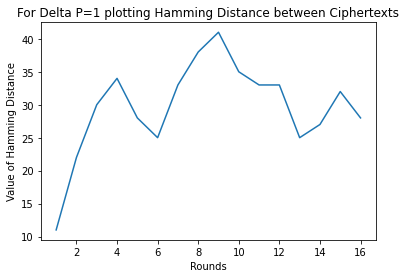

In [172]:
round_no = np.arange(1, 17)

plt.plot(round_no, Delta_C1_for_P1) 
plt.xlabel('Rounds')
plt.ylabel('Value of Hamming Distance')
plt.title('For Delta P=1 plotting Hamming Distance between Ciphertexts')
plt.show()


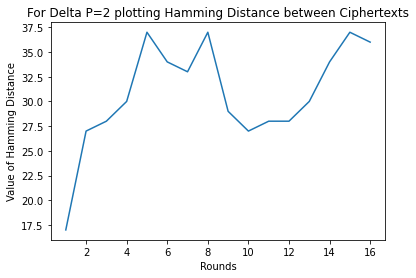

In [173]:
plt.plot(round_no, Delta_C2_for_P2) 
plt.xlabel('Rounds')
plt.ylabel('Value of Hamming Distance')
plt.title('For Delta P=2 plotting Hamming Distance between Ciphertexts')
plt.show()


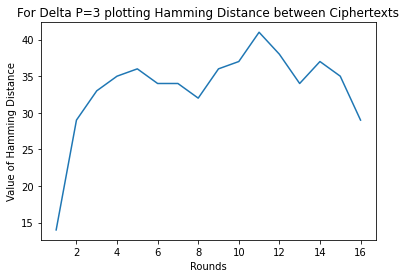

In [174]:
plt.plot(round_no, Delta_C3_for_P3) 
plt.xlabel('Rounds')
plt.ylabel('Value of Hamming Distance')
plt.title('For Delta P=3 plotting Hamming Distance between Ciphertexts')
plt.show()


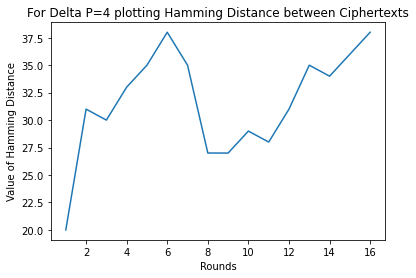

In [175]:
plt.plot(round_no, Delta_C4_for_P4) 
plt.xlabel('Rounds')
plt.ylabel('Value of Hamming Distance')
plt.title('For Delta P=4 plotting Hamming Distance between Ciphertexts')
plt.show()

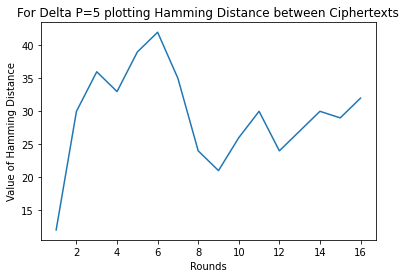

In [176]:
plt.plot(round_no, Delta_C5_for_P5) 
plt.xlabel('Rounds')
plt.ylabel('Value of Hamming Distance')
plt.title('For Delta P=5 plotting Hamming Distance between Ciphertexts')
plt.show()

#### Keys with different Hamming Distance

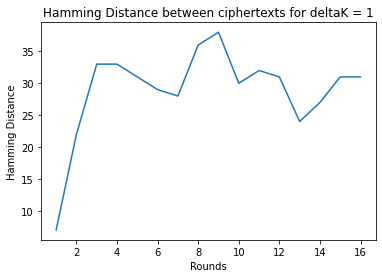

In [177]:
plt.plot(round_no, Delta_C1_for_K1) 
plt.xlabel('Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 1')
plt.show()

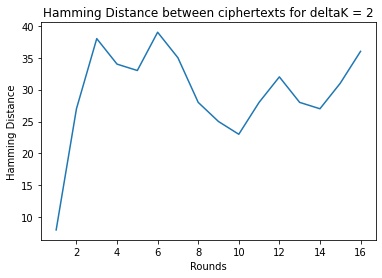

In [178]:
plt.plot(round_no, Delta_C2_for_K2) 
plt.xlabel('Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 2')
plt.show()

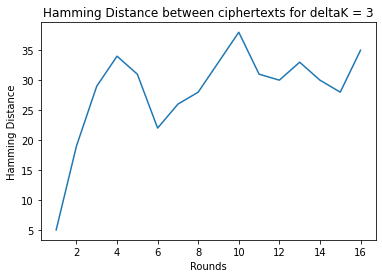

In [179]:
plt.plot(round_no, Delta_C3_for_K3) 
plt.xlabel('Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 3')
plt.show()

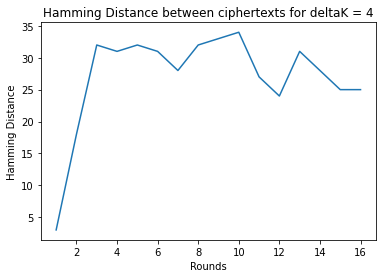

In [180]:
plt.plot(round_no, Delta_C4_for_K4) 
plt.xlabel('Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 4')
plt.show()

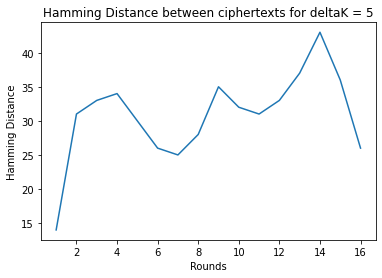

In [181]:
plt.plot(round_no, Delta_C5_for_K5) 
plt.xlabel('Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 5')
plt.show()